# Preamble & imports

In [106]:
"""Preamble: imports of required depencendies
"""
import numpy as np
from matplotlib import pyplot as plt
from random import randrange

In [107]:
"""Preamble: baseline configurations of code execution
@Note: Dimensions lower than 4 need reconfiguration of hardcoded player placement in class GridWorld. See:
    def reset(self): 
        ... 
        self.player = (4,4)
"""
DISPLAY = False              # {True, False}: enables printing of meta-information & rendering of game grid.

DIMX = 5                    # int, > 4: Dimension X of generated gridworld
DIMY = 5                    # int, > 4: Dimension Y of generated gridworld

TRIALS=100                  # int, > 0: Number of trials executed for single training operation
MAXSTEPS=(DIMX*DIMY)**2     # int, > 0: Number of steps that agent may take during number of trials

ALPHA = 0.1                 # float, 0 < ALPHA < 1: Learning rate, for Q-Table function updates
EPSILON = 0.1               # float, 0 < EPSILON < 1: Randomness over Exploration versus Exploitation
GAMMA = 0.9                 # float, 0 < GAMMA < 1: Influence of single training examples

# Environment

In [108]:
class GridWorld:
    def __init__(self, dimX, dimY, mode='static'):
        """Initializes Gridworld. Sets Dimensions, Mode and Actions, then calls reset(self).
        """
        self.dimX = dimX
        self.dimY = dimY
        self.mode = mode

        self.actions = ['W', 'A', 'S', 'D']
        self.reset()
    
    def reset(self):
        """Generates grid with reward-entry per cell. Also sets Player, Treasure and Pitfall positions.
        """
        self.grid = np.zeros(( self.dimX, self.dimY)) - 1
        self.pitfall = (2,3)        
        self.treasure = (1,3)
        self.player = (4,4)

        if self.mode == 'player-dynamic':
            self.player = (randrange(self.dimX - 1),randrange(self.dimY - 1))

        if self.mode == 'dynamic':
            self.pitfall = (randrange(self.dimX - 1),randrange(self.dimY - 1))
            self.treasure = (randrange(self.dimX - 1),randrange(self.dimY - 1))
            self.player = (randrange(self.dimX - 1),randrange(self.dimY - 1))
        
        # Avoid collision of entities
        while self.pitfall == self.treasure:
            self.pitfall = (randrange(self.dimX - 1),randrange(self.dimY - 1))
        
        while self.player == self.treasure:
            self.player = (randrange(self.dimX - 1),randrange(self.dimY - 1))

        while self.player == self.pitfall:
            self.player = (randrange(self.dimX - 1),randrange(self.dimY - 1))
        
        # Finalize Grid
        self.grid[ self.pitfall[0], self.pitfall[1]] = -50
        self.grid[ self.treasure[0], self.treasure[1]] = 50
        self.endStates = [ self.pitfall, self.treasure]
    
    def step(self, action):
        """Executes step taken by an agent.
        """
        
        # Reset visited field to -1
        self.grid[self.player[0]][self.player[1]] = -1

        reward = 0
        if action == 'W':
            if self.player[0] == 0: # Out-of-bounds countermeasure
                reward += self.grid[self.player[0], self.player[1]]
            else:
                self.player = ( self.player[0] - 1, self.player[1])
                reward += self.grid[self.player[0], self.player[1]]
        
        elif action == 'S':
            if self.player[0] == self.dimX - 1:
                reward += self.grid[self.player[0], self.player[1]]
            else:
                self.player = ( self.player[0] + 1, self.player[1])
                reward += self.grid[self.player[0], self.player[1]]
            
        elif action == 'A':
            if self.player[1] == 0:
                reward += self.grid[self.player[0], self.player[1]]
            else:
                self.player = ( self.player[0], self.player[1] - 1)
                reward += self.grid[self.player[0], self.player[1]]

        elif action == 'D':
            if self.player[1] == self.dimY - 1:
                reward += self.grid[self.player[0], self.player[1]]
            else:
                self.player = ( self.player[0], self.player[1] + 1)
                reward += self.grid[self.player[0], self.player[1]]
        
        # Set current player field to 0
        self.grid[self.player[0]][self.player[1]] = 0

        if DISPLAY: 
            self.render()

        return reward
    
    def render(self):
        """Prints present grid state to std.out
        """
        print(np.matrix(self.grid))
 

In [109]:
class Coloured_GridWorld:
    def __init__(self, dimX, dimY, mode='static'):
        """Initializes Gridworld. Sets Dimensions, Mode and Actions, then calls reset(self).
        """
        self.dimX = dimX
        self.dimY = dimY
        self.mode = mode

        self.actions = ['W', 'A', 'S', 'D']
        self.reset()
    
    def reset(self):
        """Generates grid with reward-entry per cell. Also sets Player, Treasure and Pitfall positions. Further includes special reward on cells that the player may pick up.
        """
        self.grid = np.zeros(( self.dimX, self.dimY)) - 1
        self.pitfall = (2,3)        
        self.treasure = (1,3)
        self.player = (4,4)

        self.bonus = { (1,1), (0,4) }

        if self.mode == 'player-dynamic':
            self.player = (randrange(self.dimX - 1),randrange(self.dimY - 1))

        if self.mode == 'dynamic':
            self.pitfall = (randrange(self.dimX - 1),randrange(self.dimY - 1))
            self.treasure = (randrange(self.dimX - 1),randrange(self.dimY - 1))
            self.player = (randrange(self.dimX - 1),randrange(self.dimY - 1))
        
        # Avoid collision of entities
        while self.pitfall == self.treasure:
            self.pitfall = (randrange(self.dimX - 1),randrange(self.dimY - 1))
        
        while self.player == self.treasure:
            self.player = (randrange(self.dimX - 1),randrange(self.dimY - 1))

        while self.player == self.pitfall:
            self.player = (randrange(self.dimX - 1),randrange(self.dimY - 1))

        # Finalize Grid
        self.grid[ self.pitfall[0], self.pitfall[1]] = -50
        self.grid[ self.treasure[0], self.treasure[1]] = 50

        for b in self.bonus:
            if self.grid[b[0], b[1]] == -1:
                self.grid[b[0], b[1]] = 25

        self.endStates = [ self.pitfall, self.treasure]
    
    def step(self, action):
        """Executes step taken by an agent.
        """
        
        # Reset visited field to -1
        self.grid[self.player[0]][self.player[1]] = -1

        reward = 0
        if action == 'W':
            if self.player[0] == 0: # Out-of-bounds countermeasure
                reward += self.grid[self.player[0], self.player[1]]
            else:
                self.player = ( self.player[0] - 1, self.player[1])
                reward += self.grid[self.player[0], self.player[1]]
        
        elif action == 'S':
            if self.player[0] == self.dimX - 1:
                reward += self.grid[self.player[0], self.player[1]]
            else:
                self.player = ( self.player[0] + 1, self.player[1])
                reward += self.grid[self.player[0], self.player[1]]
            
        elif action == 'A':
            if self.player[1] == 0:
                reward += self.grid[self.player[0], self.player[1]]
            else:
                self.player = ( self.player[0], self.player[1] - 1)
                reward += self.grid[self.player[0], self.player[1]]

        elif action == 'D':
            if self.player[1] == self.dimY - 1:
                reward += self.grid[self.player[0], self.player[1]]
            else:
                self.player = ( self.player[0], self.player[1] + 1)
                reward += self.grid[self.player[0], self.player[1]]
        
        # Set current player field to 0
        self.grid[self.player[0]][self.player[1]] = 0

        if DISPLAY: 
            self.render()

        return reward
    
    def render(self):
        """Prints present grid state to std.out
        """
        print(np.matrix(self.grid))
 

# Agent

In [110]:
class RandomAgent():
    """An agent using random steps per game iteration
    """        
    def __init__(self, environment):
        self.environment = environment

    def train(self, trials=10, maxSteps=100):
        rewards = [] 
    
        for trial in range(trials):
            cumulative_reward = 0
            step = 0
            game_over = False
            while step < maxSteps and game_over != True:
                action = np.random.choice(self.environment.actions) 
                reward = self.environment.step(action)
    
                if DISPLAY: 
                    print("Step {}\tReward {}\t Action to take: {}".format(step, cumulative_reward, action))

                cumulative_reward += reward
                step += 1
            
                if self.environment.player in self.environment.endStates:
                    self.environment.reset()
                    game_over = True     
                
            rewards.append(cumulative_reward)
        
        return rewards

In [111]:
class QAgent():
    """An agent using Q-learning procedures.
    """   
    def __init__(self, environment, epsilon=0.05, alpha=0.1, gamma=1):
        self.environment = environment
        self.alpha = alpha
        self.epsilon = epsilon
        self.gamma = gamma
        
        # Setup statespace for each cell of the grid
        self.q_table = dict()
        for x in range(environment.dimX):
            for y in range(environment.dimY):
                self.q_table[(x,y)] = {'W':0, 'S':0, 'A':0, 'D':0}


    def train(self, trials=10, maxSteps=100):
        rewards = [] 
    
        for trial in range(trials):
            cumulative_reward = 0 
            step = 0
            game_over = False
            while step < maxSteps and game_over != True:
                # (3.0) Store St for updating Q-Value function
                old_state = self.environment.player
                
                # (1) Select Action At = arg-max Q(St, a)
                if np.random.uniform(0,1) < self.epsilon:
                    action = self.environment.actions[np.random.randint(0, len(self.environment.actions))]
                else:
                    action = max(self.q_table[self.environment.player], key=self.q_table[self.environment.player].get)
                
                if DISPLAY: 
                    print("Step {}\tReward {}\tQ-Space {}\t Action to take: {}".format(step, cumulative_reward, self.q_table[self.environment.player], action))

                # (2.1) Apply At
                reward = self.environment.step(action)
                
                # (2.2) Get Reward
                cumulative_reward += reward

                # (2.3) Set next state                
                new_state = self.environment.player            

                # (3.0) Update the Q-Value Function
                q_values_of_state = self.q_table[new_state]
                max_q_value_in_new_state = max(q_values_of_state.values())
                self.q_table[old_state][action] = self.q_table[old_state][action] + self.alpha * (reward + self.gamma * max_q_value_in_new_state)

                # (4) Set t = t+1, and repeat
                step += 1
            
                if self.environment.player in self.environment.endStates:
                    self.environment.reset()
                    game_over = True     
                
            rewards.append(cumulative_reward) 
        
        return rewards

In [112]:
"""[[Implementation discontinued]]
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import os


class LinearQNet(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super().__init__()
        self.linLayer1 = nn.Linear(input_size, hidden_size)
        self.linLayer2 = nn.Linear(hidden_size, output_size)
    
    def forward(self, f):
        f = F.relu(self.linLayer1(f))
        f = self.linLayer2(f)
        return f
    
    def save(self, file='linQnet.pth'):
        folder = './torch_model'
        if not os.path.exists(folder):
            os.makedirs(folder)
        file = os.path.join(folder, file)
        torch.save(self.state_dict(), file)

class TorchQAgent:
    def __init__(self, alpha, gamma, epsilon, model):
        self.lr = alpha
        self.gamma = gamma
        self.epsilon = epsilon
        self.model = model
        
        self.optimizer = optim.Adam(model.parameters(), lr=self.lr)
        self.criterion = nn.MSELoss()

    def step(self, state, action, reward, next_state, done):
        state = torch.tensor(state)
        next_state = torch.tensor(next_state)
        action = torch.tensor(action)
        reward = torch.tensor(reward)

        if len(state.shape) == 1:
            state = torch.unsqueeze(state, 0)
            next_state = torch.unsqueeze(next_state, 0)
            action = torch.unsqueeze(action, 0)
            reward = torch.unsqueeze(reward, 0)
            done = (done, )

        predict = self.model(state)
        target = predict.clone()

        for index in range(len(done)):
            newQ = reward[index]
            if not done[index]:
                newQ = reward[index] + self.gamma * torch.max(self.model(next_state[index]))
            target[index][torch.argmax(action[index]).item()] = newQ

        self.optimizer.zero_grad()
        loss = self.criterion(target, predict)
        loss.backward()
        self.optimizer.step()

    def train(trials=10, maxSteps = 100):
        # TODO
        pass
"""

"[[Implementation discontinued]]\nimport torch\nimport torch.nn as nn\nimport torch.optim as optim\nimport torch.nn.functional as F\nimport os\n\n\nclass LinearQNet(nn.Module):\n    def __init__(self, input_size, hidden_size, output_size):\n        super().__init__()\n        self.linLayer1 = nn.Linear(input_size, hidden_size)\n        self.linLayer2 = nn.Linear(hidden_size, output_size)\n    \n    def forward(self, f):\n        f = F.relu(self.linLayer1(f))\n        f = self.linLayer2(f)\n        return f\n    \n    def save(self, file='linQnet.pth'):\n        folder = './torch_model'\n        if not os.path.exists(folder):\n            os.makedirs(folder)\n        file = os.path.join(folder, file)\n        torch.save(self.state_dict(), file)\n\nclass TorchQAgent:\n    def __init__(self, alpha, gamma, epsilon, model):\n        self.lr = alpha\n        self.gamma = gamma\n        self.epsilon = epsilon\n        self.model = model\n        \n        self.optimizer = optim.Adam(model.par

# Testing

Average score of algorithm: -53.09


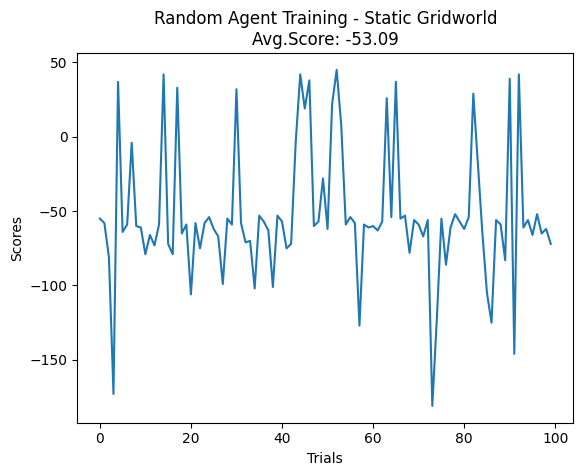

In [113]:
environment = GridWorld(DIMX,DIMY,'static')
agent = RandomAgent(environment)

rewards = agent.train(trials=TRIALS, maxSteps=MAXSTEPS)
plt.title('Random Agent Training - Static Gridworld\nAvg.Score: {}'.format(np.mean(rewards)))
plt.xlabel("Trials")
plt.ylabel("Scores")
plt.plot(rewards)
plt.savefig('RandomAgent_Static.png')

print("Average score of algorithm: {}".format(np.mean(rewards)))

Average score of algorithm: -48.68


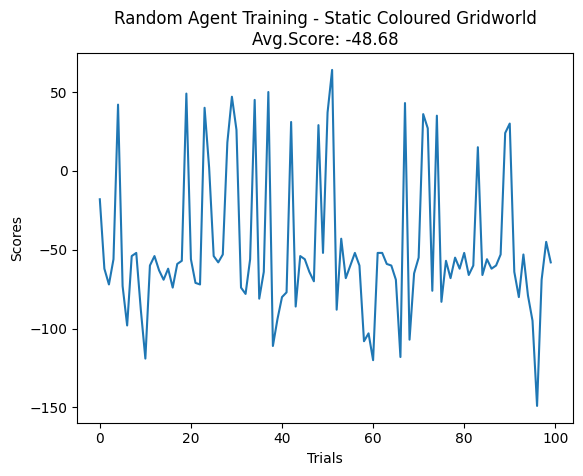

In [114]:
environment = Coloured_GridWorld(DIMX,DIMY,'static')
agent = RandomAgent(environment)

rewards = agent.train(trials=TRIALS, maxSteps=MAXSTEPS)
plt.title('Random Agent Training - Static Coloured Gridworld\nAvg.Score: {}'.format(np.mean(rewards)))
plt.xlabel("Trials")
plt.ylabel("Scores")
plt.plot(rewards)
plt.savefig('RandomAgent_Coloured_Static.png')

print("Average score of algorithm: {}".format(np.mean(rewards)))

Average score of algorithm: 37.82


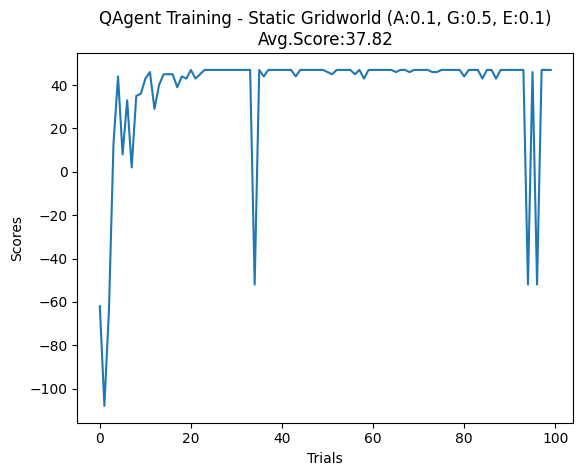

In [115]:
environment = GridWorld(DIMX,DIMY,'static')
agent = QAgent(environment, epsilon=EPSILON, alpha=ALPHA, gamma=GAMMA)

rewards = agent.train(trials=TRIALS, maxSteps=MAXSTEPS)
plt.title('QAgent Training - Static Gridworld (A:{}, G:{}, E:{})\nAvg.Score:{}'.format(ALPHA, GAMMA, EPSILON, np.mean(rewards)))
plt.xlabel("Trials")
plt.ylabel("Scores")
plt.plot(rewards)
picname = 'QAgent_{}x{}_Static_Alp{}_Gam{}_Eps{}.png'.format(DIMX, DIMY, ALPHA, GAMMA, EPSILON)
plt.savefig(picname)

print("Average score of algorithm: {}".format(np.mean(rewards)))

f = open("results.csv", 'a')
f.write("Normal, Static, {}, {}, {}, {}\n".format(ALPHA, GAMMA, EPSILON, np.mean(rewards)))
f.close()

Average score of algorithm: -281.7


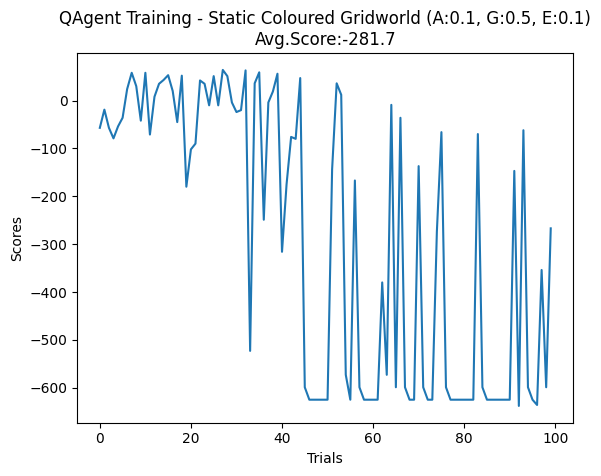

In [116]:
environment = Coloured_GridWorld(DIMX,DIMY,'static')
agent = QAgent(environment, epsilon=EPSILON, alpha=ALPHA, gamma=GAMMA)

rewards = agent.train(trials=TRIALS, maxSteps=MAXSTEPS)
plt.title('QAgent Training - Static Coloured Gridworld (A:{}, G:{}, E:{})\nAvg.Score:{}'.format(ALPHA, GAMMA, EPSILON, np.mean(rewards)))
plt.xlabel("Trials")
plt.ylabel("Scores")
plt.plot(rewards)
picname = 'QAgent_{}x{}_Coloured_Static_Alp{}_Gam{}_Eps{}.png'.format(DIMX, DIMY, ALPHA, GAMMA, EPSILON)
plt.savefig(picname)

print("Average score of algorithm: {}".format(np.mean(rewards)))

f = open("results.csv", 'a')
f.write("Coloured, Static, {}, {}, {}, {}\n".format(ALPHA, GAMMA, EPSILON, np.mean(rewards)))
f.close()

Average score of algorithm: 38.47


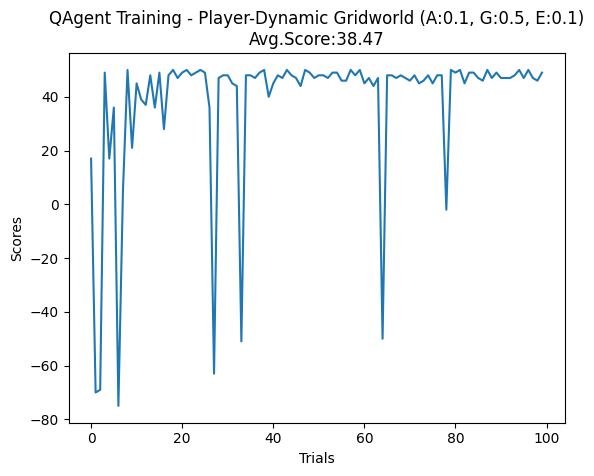

In [117]:
environment = GridWorld(DIMX,DIMY,'player-dynamic')
agent = QAgent(environment, epsilon=EPSILON, alpha=ALPHA, gamma=GAMMA)

rewards = agent.train(trials=TRIALS, maxSteps=MAXSTEPS)
plt.title('QAgent Training - Player-Dynamic Gridworld (A:{}, G:{}, E:{})\nAvg.Score:{}'.format(ALPHA, GAMMA, EPSILON, np.mean(rewards)))
plt.xlabel("Trials")
plt.ylabel("Scores")
plt.plot(rewards)
picname = 'QAgent_{}x{}_DynamicPlayer_Alp{}_Gam{}_Eps{}.png'.format(DIMX, DIMY, ALPHA, GAMMA, EPSILON)
plt.savefig(picname)

print("Average score of algorithm: {}".format(np.mean(rewards)))

f = open("results.csv", 'a')
f.write("Normal, Player-Dynamic, {}, {}, {}, {}\n".format(ALPHA, GAMMA, EPSILON, np.mean(rewards)))
f.close()

/tmp/ipykernel_181437/2658365672.py:49: RuntimeWarning: overflow encountered in double_scalars
  self.q_table[old_state][action] = self.q_table[old_state][action] + self.alpha * (reward + self.gamma * max_q_value_in_new_state)


Average score of algorithm: -345.58


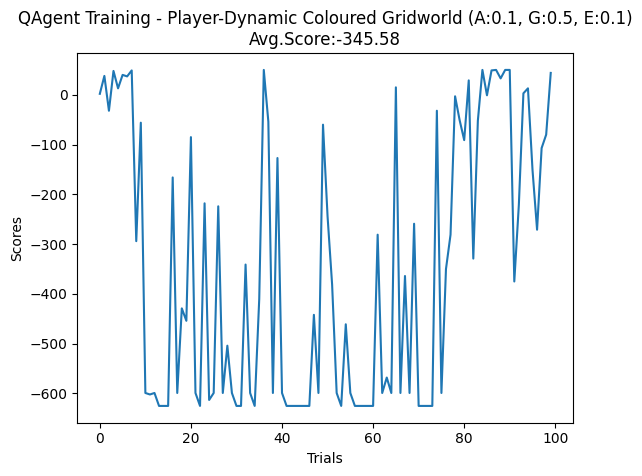

In [118]:
environment = Coloured_GridWorld(DIMX,DIMY,'player-dynamic')
agent = QAgent(environment, epsilon=EPSILON, alpha=ALPHA, gamma=GAMMA)

rewards = agent.train(trials=TRIALS, maxSteps=MAXSTEPS)
plt.title('QAgent Training - Player-Dynamic Coloured Gridworld (A:{}, G:{}, E:{})\nAvg.Score:{}'.format(ALPHA, GAMMA, EPSILON, np.mean(rewards)))
plt.xlabel("Trials")
plt.ylabel("Scores")
plt.plot(rewards)
picname = 'QAgent_{}x{}_Coloured_DynamicPlayer_Alp{}_Gam{}_Eps{}.png'.format(DIMX, DIMY, ALPHA, GAMMA, EPSILON)
plt.savefig(picname)

print("Average score of algorithm: {}".format(np.mean(rewards)))

f = open("results.csv", 'a')
f.write("Coloured, Player-Dynamic, {}, {}, {}, {}\n".format(ALPHA, GAMMA, EPSILON, np.mean(rewards)))
f.close()

Average score of algorithm: -215.6


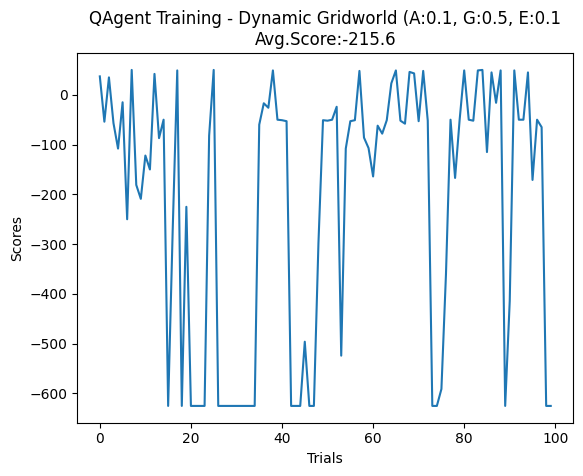

In [119]:
environment = GridWorld(DIMX,DIMY,'dynamic')
agent = QAgent(environment, epsilon=EPSILON, alpha=ALPHA, gamma=GAMMA)

rewards = agent.train(trials=TRIALS, maxSteps=MAXSTEPS)
plt.title('QAgent Training - Dynamic Gridworld (A:{}, G:{}, E:{}\nAvg.Score:{}'.format(ALPHA, GAMMA, EPSILON, np.mean(rewards)))
plt.xlabel("Trials")
plt.ylabel("Scores")
plt.plot(rewards)

picname = 'QAgent_{}x{}_Dynamic_Alp{}_Gam{}_Eps{}.png'.format(DIMX, DIMY, ALPHA, GAMMA, EPSILON)
plt.savefig(picname)

print("Average score of algorithm: {}".format(np.mean(rewards)))

f = open("results.csv", 'a')
f.write("Normal, Dynamic, {}, {}, {}, {}\n".format(ALPHA, GAMMA, EPSILON, np.mean(rewards)))
f.close()

/tmp/ipykernel_181437/2658365672.py:49: RuntimeWarning: overflow encountered in double_scalars
  self.q_table[old_state][action] = self.q_table[old_state][action] + self.alpha * (reward + self.gamma * max_q_value_in_new_state)


Average score of algorithm: -365.44


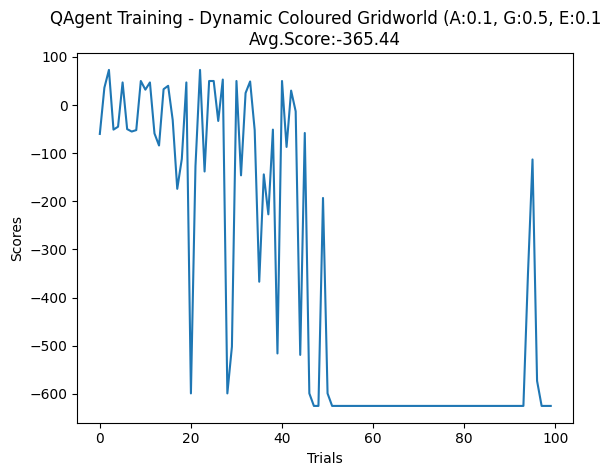

In [120]:
environment = Coloured_GridWorld(DIMX,DIMY,'dynamic')
agent = QAgent(environment, epsilon=EPSILON, alpha=ALPHA, gamma=GAMMA)

rewards = agent.train(trials=TRIALS, maxSteps=MAXSTEPS)
plt.title('QAgent Training - Dynamic Coloured Gridworld (A:{}, G:{}, E:{}\nAvg.Score:{}'.format(ALPHA, GAMMA, EPSILON, np.mean(rewards)))
plt.xlabel("Trials")
plt.ylabel("Scores")
plt.plot(rewards)

picname = 'QAgent_{}x{}_Coloured_Dynamic_Alp{}_Gam{}_Eps{}.png'.format(DIMX, DIMY, ALPHA, GAMMA, EPSILON)
plt.savefig(picname)

print("Average score of algorithm: {}".format(np.mean(rewards)))

f = open("results.csv", 'a')
f.write("Coloured, Dynamic, {}, {}, {}, {}\n".format(ALPHA, GAMMA, EPSILON, np.mean(rewards)))
f.close()